# Customer Segmentation using K-Means

## Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
# Load the data
data = pd.read_csv ('Mall_Customers.csv', index_col='CustomerID')

In [3]:
# Check what's inside
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [4]:
#renaming the feature names for convenience
data.rename(columns={'Annual Income (k$)':'Annual Income', 'Spending Score (1-100)':'Spending Score'},inplace=True)
data.head()

,Gender,Age,Annual Income,Spending Score
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [5]:
#Checking the number of rows and columns
data.shape

(200, 4)

In [6]:
#To fing out the datatypes and missing values of each feauture
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          200 non-null    object
 1   Age             200 non-null    int64 
 2   Annual Income   200 non-null    int64 
 3   Spending Score  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


# Detecting and handling outliers

Text(0.5, 1.0, 'Boxplot of Annual Income')

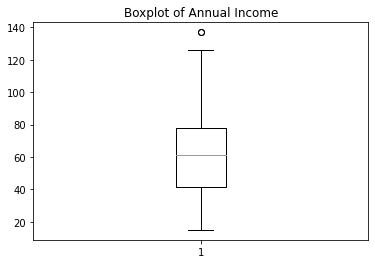

In [8]:
# Detecting outliers using a boxplot
plt.boxplot(data['Annual Income'])
plt.title('Boxplot of Annual Income')

Text(0.5, 1.0, 'Boxplot of Spending Score')

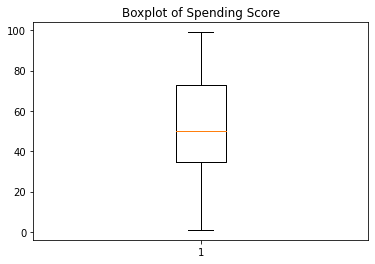

In [9]:
plt.boxplot(data['Spending Score'])
plt.title('Boxplot of Spending Score')

Text(0.5, 1.0, 'Boxplot of Age')

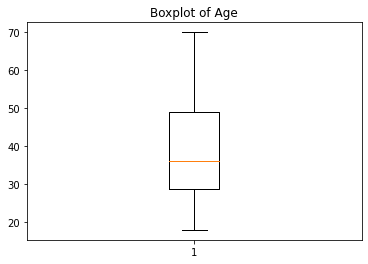

In [10]:
plt.boxplot(data['Age'])
plt.title('Boxplot of Age')

In [11]:
# Handling outliers present in 'Annual Income'

In [12]:
Q1=np.percentile(data['Annual Income'],25,interpolation='midpoint')
Q2=np.percentile(data['Annual Income'],50,interpolation='midpoint')
Q3=np.percentile(data['Annual Income'],75,interpolation='midpoint')

IQR=Q3-Q1
low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR

In [13]:
low_limit

-14.5

In [14]:
up_limit

133.5

In [15]:
outlier=[]
for x in data['Annual Income']:
    if((x>up_limit)or(x<low_limit)):
        outlier.append(x)

In [16]:
outlier

[137, 137]

In [17]:
outlier_index=data['Annual Income']>up_limit
data.loc[outlier_index].index

Int64Index([199, 200], dtype='int64', name='CustomerID')

In [18]:
data.drop([199, 200],inplace=True)

Text(0.5, 1.0, 'Boxplot of Annual Income')

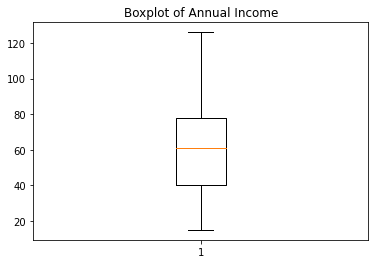

In [19]:
#checking too see if the outliers were removed 
plt.boxplot(data['Annual Income'])
plt.title('Boxplot of Annual Income')

# EDA & Data Visualizations

## Univariate analysis

Univariate analysis means analysis of a single variable. It’s mainly describes the characteristics of the variable.

C:\Users\Nehla Shajahan\Anaconda new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

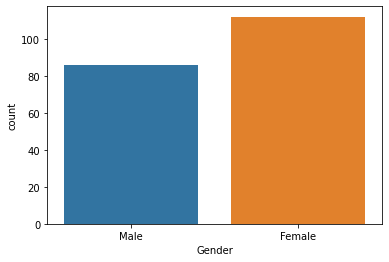

In [20]:
sns.countplot(data['Gender'])

In [21]:
#There are more number of females in the dataset when compared to males

C:\Users\Nehla Shajahan\Anaconda new\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

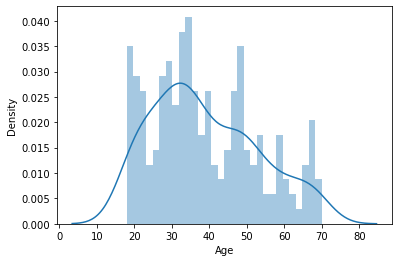

In [22]:
sns.distplot(data['Age'], bins=30)

In [23]:
#It is visible that the age column contains values that are almost normally distributed. 
#The kde on the distplot looks like a bell-curve.
#The majority of data points are relatively similar, meaning they occur within a small range of values with fewer outliers on the high and low ends of the data range.

### Treating the categorical feature 

Since, the categorical variables must be pre-processed before deploying the model, we will be converting our only categotical feature, 'Gender' by mapping each of its unique value 'Male'and 'Female' to 0 and 1 respectively.


In [24]:
#mapping the unique categorical values to 0 and 1
gender= {'Male':0, 'Female':1}
data['Gender']= data['Gender'].map(gender)

In [25]:
#To check if our mapping worked or not
data.head()

,Gender,Age,Annual Income,Spending Score
CustomerID,,,,
1,0,19,15,39
2,0,21,15,81
3,1,20,16,6
4,1,23,16,77
5,1,31,17,40


### Bivariate Analysis of numerical features
Bivariate analysis involves checking the relationship between two variables simultaneously.

Text(0.5, 1.0, 'Scatter plot between Age and Spending Score')

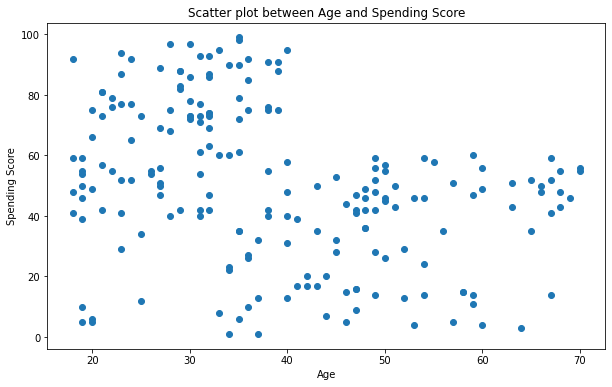

In [26]:
plt.figure(figsize=(10,6))
plt.scatter(data['Age'],data['Spending Score'], marker='o');
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Scatter plot between Age and Spending Score')

In [27]:
#People between the age group of 20-40 roughly have the highest spending score or in other words, lower the age higher the spending score

Text(0.5, 1.0, 'Scatter plot between Age and Annual Income')

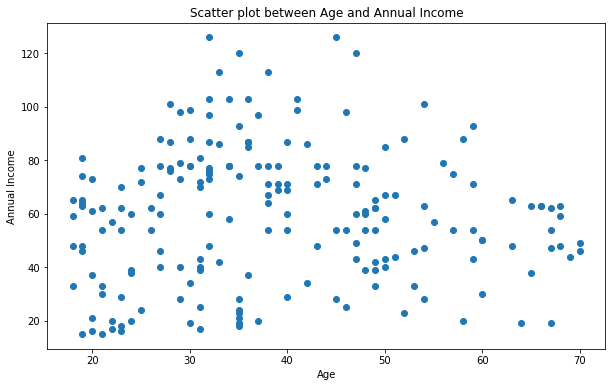

In [28]:
plt.figure(figsize=(10,6))
plt.scatter(data['Age'],data['Annual Income'], marker='o');
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.title('Scatter plot between Age and Annual Income')

In [29]:
#It can be concluded from the above scatter plot that people between the age group of 30-50 get the highest income.

Text(0.5, 1.0, 'Scatter plot between Annual Income and Spending Score')

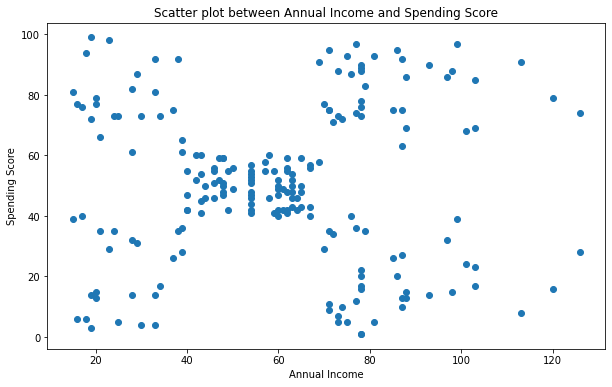

In [30]:
plt.figure(figsize=(10,6))
plt.scatter(data['Annual Income'],data['Spending Score'], marker='o');
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Scatter plot between Annual Income and Spending Score')

In [31]:
#Coincidentally, we can see that roughly Annual income of $40-60k corresponds to 40-60 spending score

Text(0.5, 1.0, 'Scatter plot between Gender and Spending Score')

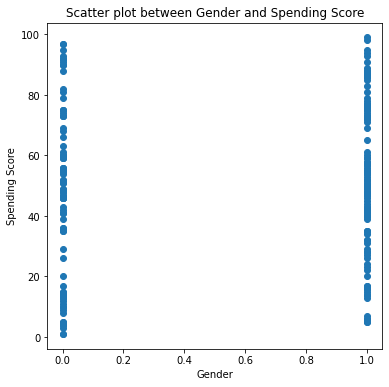

In [33]:
plt.figure(figsize=(6,6))
plt.scatter(data['Gender'],data['Spending Score'], marker='o');
plt.xlabel('Gender')
plt.ylabel('Spending Score')
plt.title('Scatter plot between Gender and Spending Score')

* The spending score correspoding to females (mapped to 1) is slighlty higher than the spending score of males. Females are slightly more likely to spend more

Text(0.5, 1.0, 'Scatter plot between Gender and Annual Income')

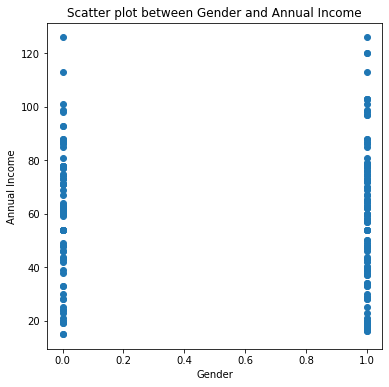

In [34]:
plt.figure(figsize=(6,6))
plt.scatter(data['Gender'],data['Annual Income'], marker='o');
plt.xlabel('Gender')
plt.ylabel('Annual Income')
plt.title('Scatter plot between Gender and Annual Income')

* There is hardly any difference in the annual income of both genders after removing outliers 

Text(0.5, 1.0, 'Scatter plot between Gender and Age')

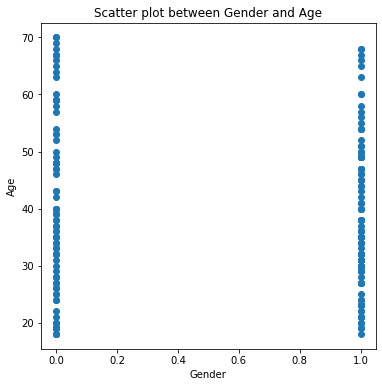

In [35]:
plt.figure(figsize=(6,6))
plt.scatter(data['Gender'],data['Age'], marker='o');
plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('Scatter plot between Gender and Age')

In [36]:
# All the above 3 graphs can be summarised using a pair plot

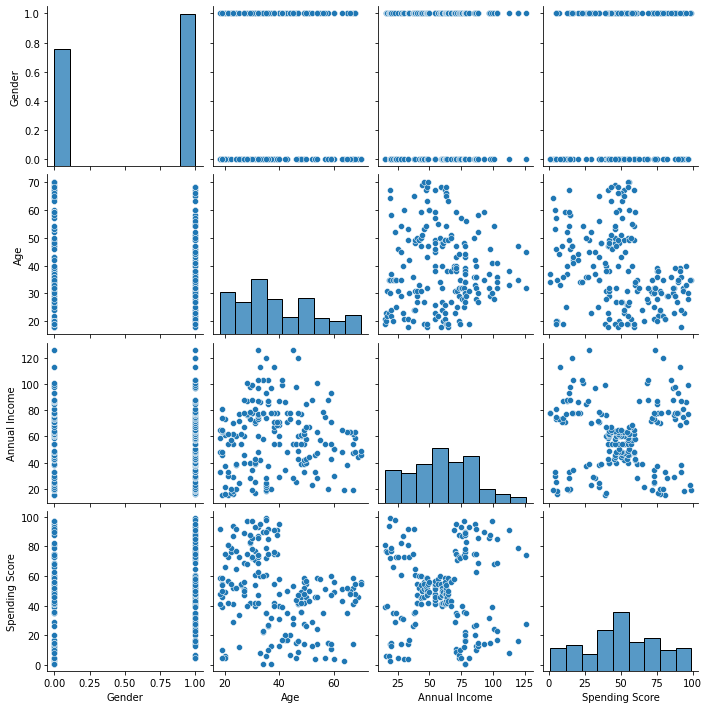

In [37]:
sns.pairplot(data)

In [38]:
#To check for correlation using a heatmap

<AxesSubplot:>

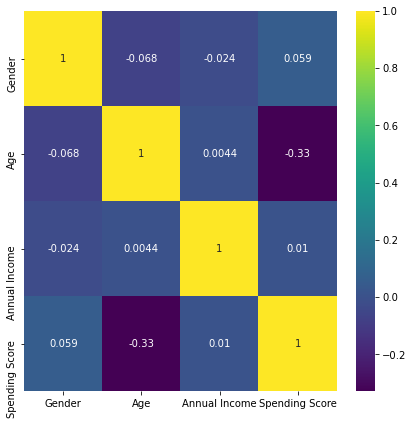

In [39]:
fig_dims = (7, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(data.corr(), annot=True, cmap='viridis')

* From the above heatmap, we can find that 'Age' is negatively correlated with 'Spending Score'.
* 'Annual Income' is very less correlated with 'Age'
* 'Gender' is very less correlated with 'Spending Score' but more correlated, when compared to 'Annual Income'

## Standard Scaling the features

In [40]:
#standard scaling the features to bring them around the same scale
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['Age', 'Annual Income', 'Spending Score']])

In [41]:
#checking if it worked
data.head()

,Gender,Age,Annual Income,Spending Score
CustomerID,,,,
1,0,19,15,39
2,0,21,15,81
3,1,20,16,6
4,1,23,16,77
5,1,31,17,40


# Building the clustering model

In [42]:
#create a copy of the data variable
x = data.copy()

In [43]:
# Create an object (which we would call kmeans)
# The number in the brackets is K, or the number of clusters we are aiming for
kmeans = KMeans(3)
# Fit the data
kmeans.fit(x)

KMeans(n_clusters=3)

In [44]:
# Create a copy of the input data
clusters = x.copy()
# Take note of the predicted clusters 
clusters['cluster_pred']=kmeans.fit_predict(x)

Text(0, 0.5, 'Spending Score')

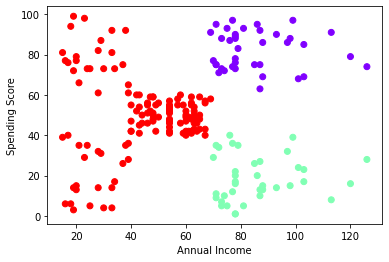

In [45]:
# Plot the data using the Annual Income and the Spending Score 
# c (color) is an argument which could be coded with a variable 
# The variable in this case has values 0,1, indicating to plt.scatter, that there are two colors (0,1)
# All points in cluster 0 will be the same colour, all points in cluster 1 - another one, etc.
plt.scatter(clusters['Annual Income'],clusters['Spending Score'],c=clusters['cluster_pred'],cmap='rainbow')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

C:\Users\Nehla Shajahan\Anaconda new\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'within Clusters Sum of Squares(WCSS)')

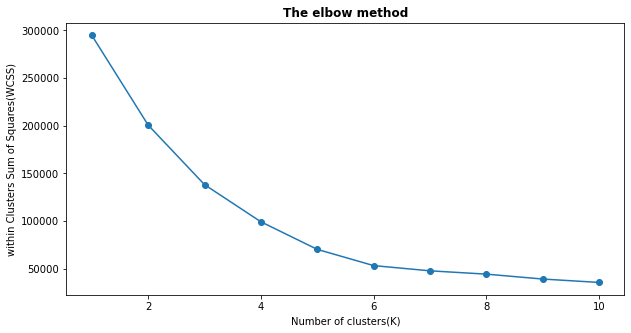

In [46]:
wcss=[]

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 42)
    kmeans.fit(x)
    wcss_iter=kmeans.inertia_
    wcss.append(wcss_iter)
    
# Plotting the results onto a line graph to help us observe 'The Elbow'
plt.figure(figsize=(10,5))
no_clusters=range(1,11)
plt.plot(no_clusters, wcss,marker = "o")
plt.title('The elbow method', fontweight="bold")
plt.xlabel('Number of clusters(K)')
plt.ylabel('within Clusters Sum of Squares(WCSS)')

In [47]:
#Finding out the silhouette score to see if we have built a good model

In [49]:
print(silhouette_score(clusters, kmeans.labels_, metric='euclidean'))

0.370946442780475


In [50]:
#assign the optimal number of clusters as 5
kmeans_new = KMeans(5)
# Fit the data
kmeans_new.fit(x)
# Create a new data frame with the predicted clusters
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x)

#mapping the gender variable back to 'male' and 'female'
gender= {0:'Male',1:'Female'}
clusters_new['Gender']= clusters_new['Gender'].map(gender)

In [51]:
# Check if everything seems right
clusters_new.head()

,Gender,Age,Annual Income,Spending Score,cluster_pred
CustomerID,,,,,
1,Male,19,15,39,0
2,Male,21,15,81,3
3,Female,20,16,6,0
4,Female,23,16,77,3
5,Female,31,17,40,0


In [52]:
#Plotting the finally made clusters

Text(0, 0.5, 'Spending Score')

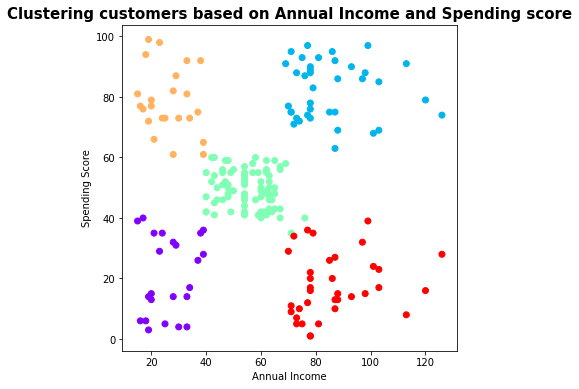

In [53]:
plt.figure(figsize=(6,6))
plt.scatter(clusters_new['Annual Income'],clusters_new['Spending Score'],c=clusters_new['cluster_pred'],cmap='rainbow')
plt.title("Clustering customers based on Annual Income and Spending score", fontsize=15,fontweight="bold")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")

On the basis of the above graph, we can say that the clusters represent the following 5 groups:

1. High annual income, High Spending score

2. Low annual income, High spending score

3. High annual income, Low spending score

4. Low annual income, Low spending score

5. Intermediate annual income, Intermediate spending score


## Cluster Analysis

In [54]:
#Now we look into the built clusters deeper for better insights

In [55]:
#To compare attributes of the different clusters, lets find the average of all variables across each cluster
avg_data = clusters_new.groupby(['cluster_pred'], as_index=False).mean()
avg_data

,cluster_pred,Age,Annual Income,Spending Score
0,0,45.217391,26.304348,20.913043
1,1,32.763158,85.210526,82.105263
2,2,43.088608,55.291139,49.569620
3,3,25.521739,26.304348,78.565217
4,4,40.914286,86.342857,17.571429


<AxesSubplot:xlabel='cluster_pred', ylabel='Age'>

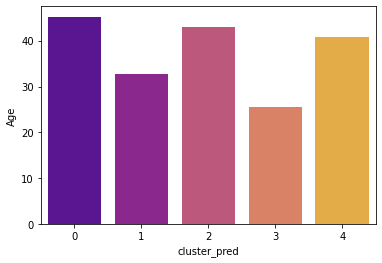

In [56]:
#To get a clearer picture, we use visualizations
sns.barplot(x='cluster_pred',y='Age',palette="plasma", data=avg_data)

<AxesSubplot:xlabel='cluster_pred', ylabel='Annual Income'>

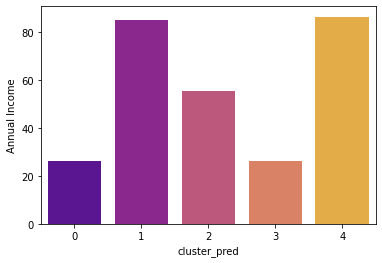

In [57]:
sns.barplot(x='cluster_pred',y='Annual Income',palette="plasma", data=avg_data)

<AxesSubplot:xlabel='cluster_pred', ylabel='Spending Score'>

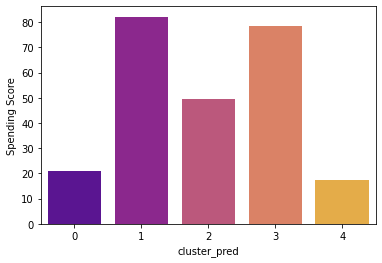

In [58]:
sns.barplot(x='cluster_pred',y='Spending Score',palette="plasma", data=avg_data)

In [59]:
#To understand the gender divide of each cluster
data2 = pd.DataFrame(clusters_new.groupby(['cluster_pred','Gender'])['Gender'].count())
data2

Gender
cluster_pred Gender        
0            Female      14
             Male         9
1            Female      21
             Male        17
2            Female      46
             Male        33
3            Female      14
             Male         9
4            Female      17
             Male        18

* Cluster 0, 1, 2, 3 are pre-dominantly female and cluster 4 has almost equal proportion. (PS: The dataset had a higher female population)

# Cluster Analysis

### Cluster 0: Almost pensioned ones
Average age is 45 years; Average Annual Income is 26k in dollars; pre-dominantly female; Avg Spending Score is 21

### Cluster 1: Highly well off customers
Average age is 32 years; Average Annual Income is 85k in dollars; pre-dominantly female; Avg Spending Score is 82

### Cluster 2: Middle-class customers
Average age is 43 years; Average Annual Income is 55k in dollars; pre-dominantly female; Avg Spending Score is 49

### Cluster 3: Careless spenders
Average age is 25 years; Average Annual Income is 26k in dollars; pre-dominantly female; Avg Spending Score is 78

### Cluster 4: Cautious spenders
Average age is 41 years; Average Annual Income is 86k in dollars; almost same proportion of females and males; Avg Spending Score is 17